# Plots for paper

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

## 1. Single run example - true parameters


We can generate some synthetic data, and run the Kalman filter to see how well we recover the state.

The Kalman filter depends on a series of physical parameters (e.g. GW angular frequency). 

Lets assume we know these perfectly, and see how the filter does.

In [3]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

Model likelihood is:  -34817.9531829044


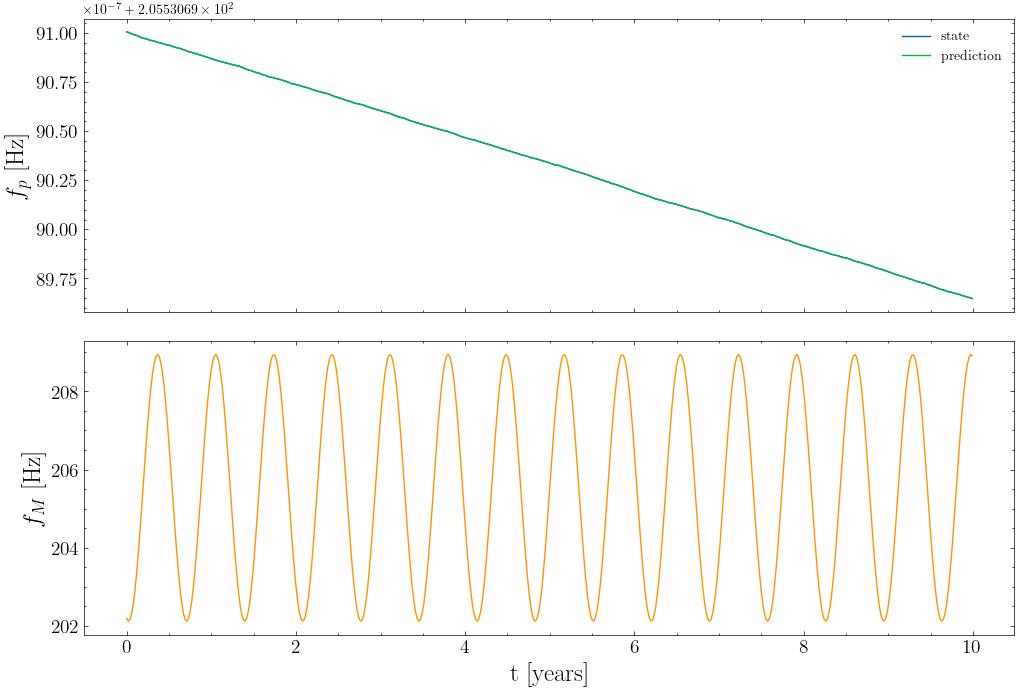

In [4]:
import numpy as np 

P    = SystemParameters()       #define the system parameters as a class
PTA  = Pulsars(P)               #setup the PTA
data = SyntheticData(PTA,P) #generate some synthetic data

#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

# Run the KFwith the correct parameters
true_parameters = priors_dict(PTA,P)
model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
print("Model likelihood is: ", model_likelihood)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, model_state_predictions, 1)


Cool! This works well. The predicted state and the true state are perfectly overlaid.



## 2. Single run example - wrong parameters


Now lets do the same thing again, but this time with the wrong parameters.

Lets just change $\omega$ from its true value of $5 \times 10^{-7}$ Hz to $1 \times 10^{-7}$ Hz.


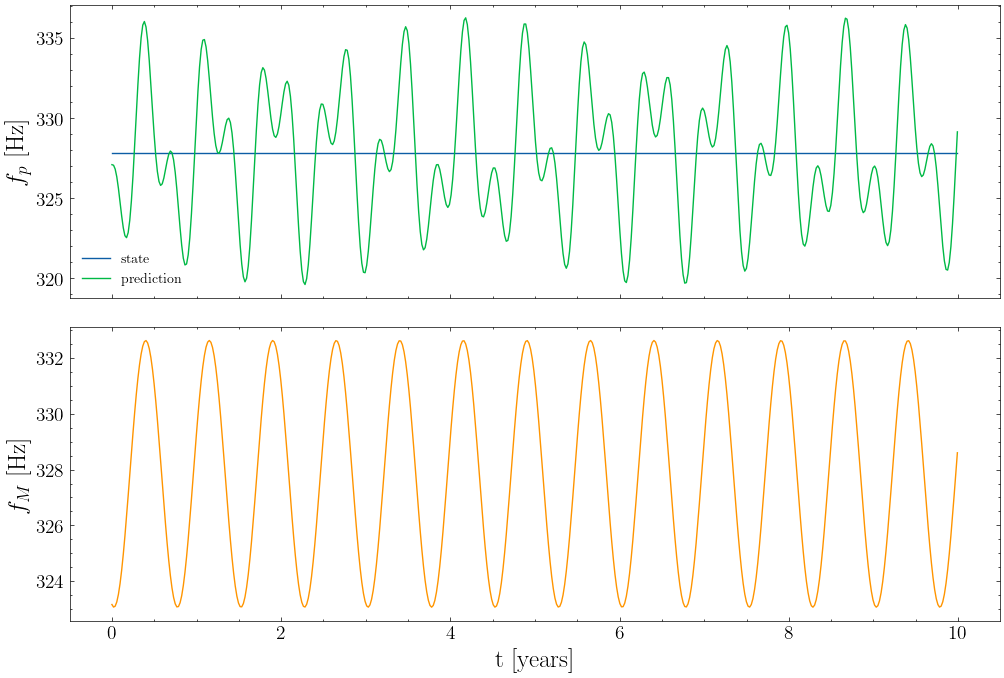

Model likelihood is:  -3.3678919458984035e+23


In [434]:
wrong_parameters = true_parameters.copy()
#wrong_parameters["omega_gw"] = 1e-7
eps = np.finfo(float).eps
wrong_parameters["delta_gw"] = 1.1

model_likelihood,model_predictions = KF.likelihood_and_states(wrong_parameters)
plot_all(PTA.t,data.intrinsic_frequency,data.f_measured,model_predictions,psr_index =0)
print("Model likelihood is: ", model_likelihood)

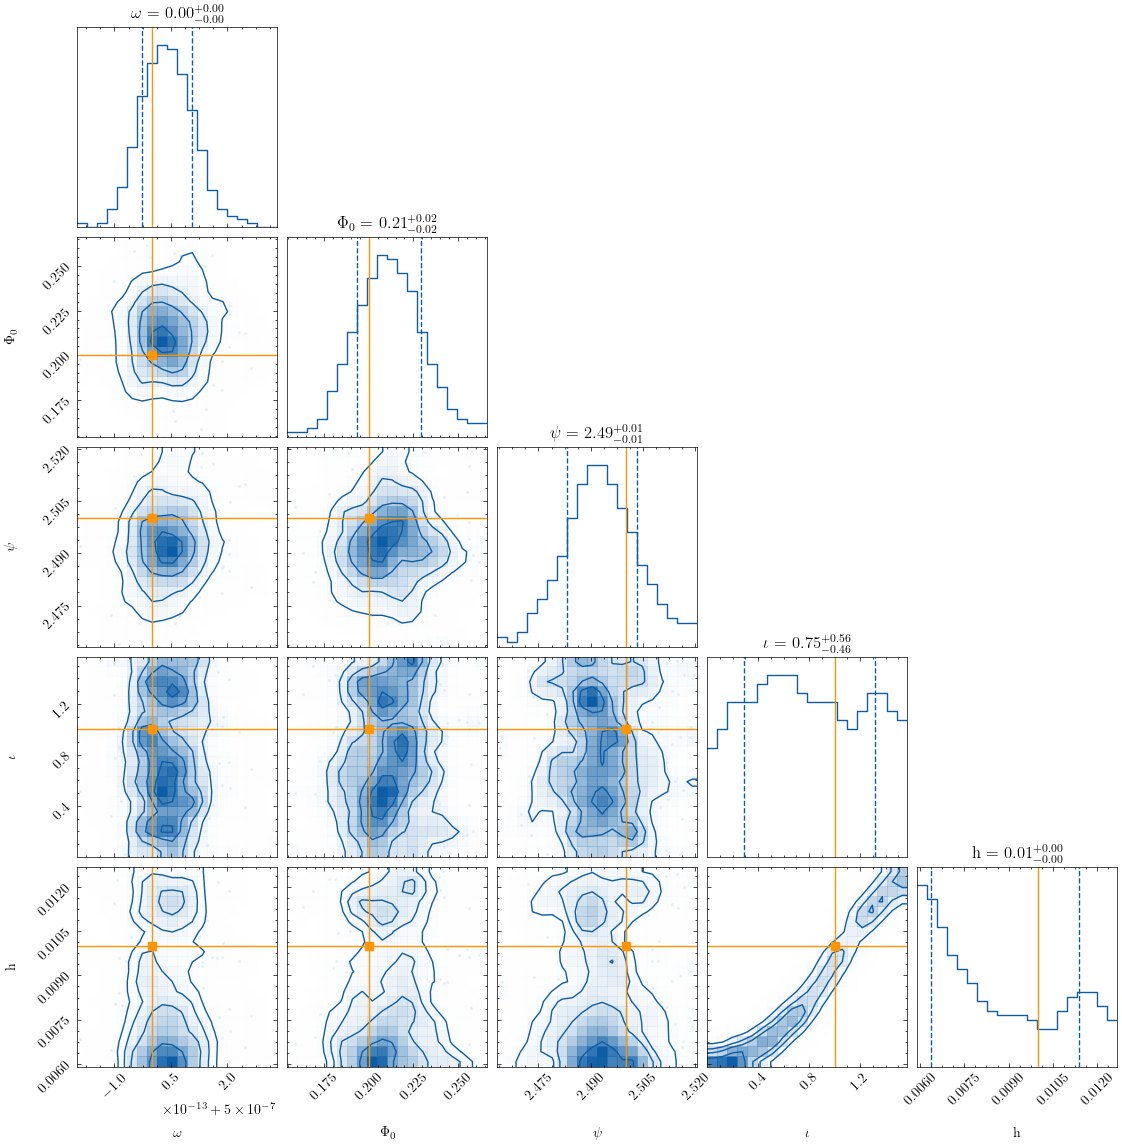

In [5]:
from plotting import plot_custom_corner
path = "../data/nested_sampling/all_bar_one_narrow_prior_result.json"
labels = [r'$\omega$', r'$\Phi_0$',r'$\psi$', r'$\iota$', r'h']
injection_parameters = [5e-7,0.20,2.50,1.0,1e-2]
axes_scales = ["log", "linear","linear","linear","log"]
plot_custom_corner(path,labels, injection_parameters,axes_scales,savefig="corner_example")

                 0         1         2         3         4
0     5.000001e-07  0.226085  2.485014  0.692189  0.008224
1     5.000003e-07  0.200596  2.502673  0.402938  0.006275
2     5.000001e-07  0.263687  2.524285  0.747684  0.008057
3     5.000000e-07  0.253071  2.522318  0.537010  0.006814
4     5.000000e-07  0.151534  2.516755  0.094789  0.006033
...            ...       ...       ...       ...       ...
1843  5.000000e-07  0.213655  2.489809  0.218418  0.006221
1844  5.000000e-07  0.207975  2.490773  1.534574  0.012193
1845  5.000000e-07  0.210269  2.496463  0.338259  0.006432
1846  5.000000e-07  0.207570  2.492480  0.128286  0.006111
1847  5.000000e-07  0.209064  2.494139  1.155815  0.010473

[1848 rows x 5 columns]
          omega_gw   phi0_gw    psi_gw   iota_gw         h  delta_gw  \
0     5.000001e-07  0.226085  2.485014  0.692189  0.008224       1.0   
1     5.000003e-07  0.200596  2.502673  0.402938  0.006275       1.0   
2     5.000001e-07  0.263687  2.524285  0.747684  0

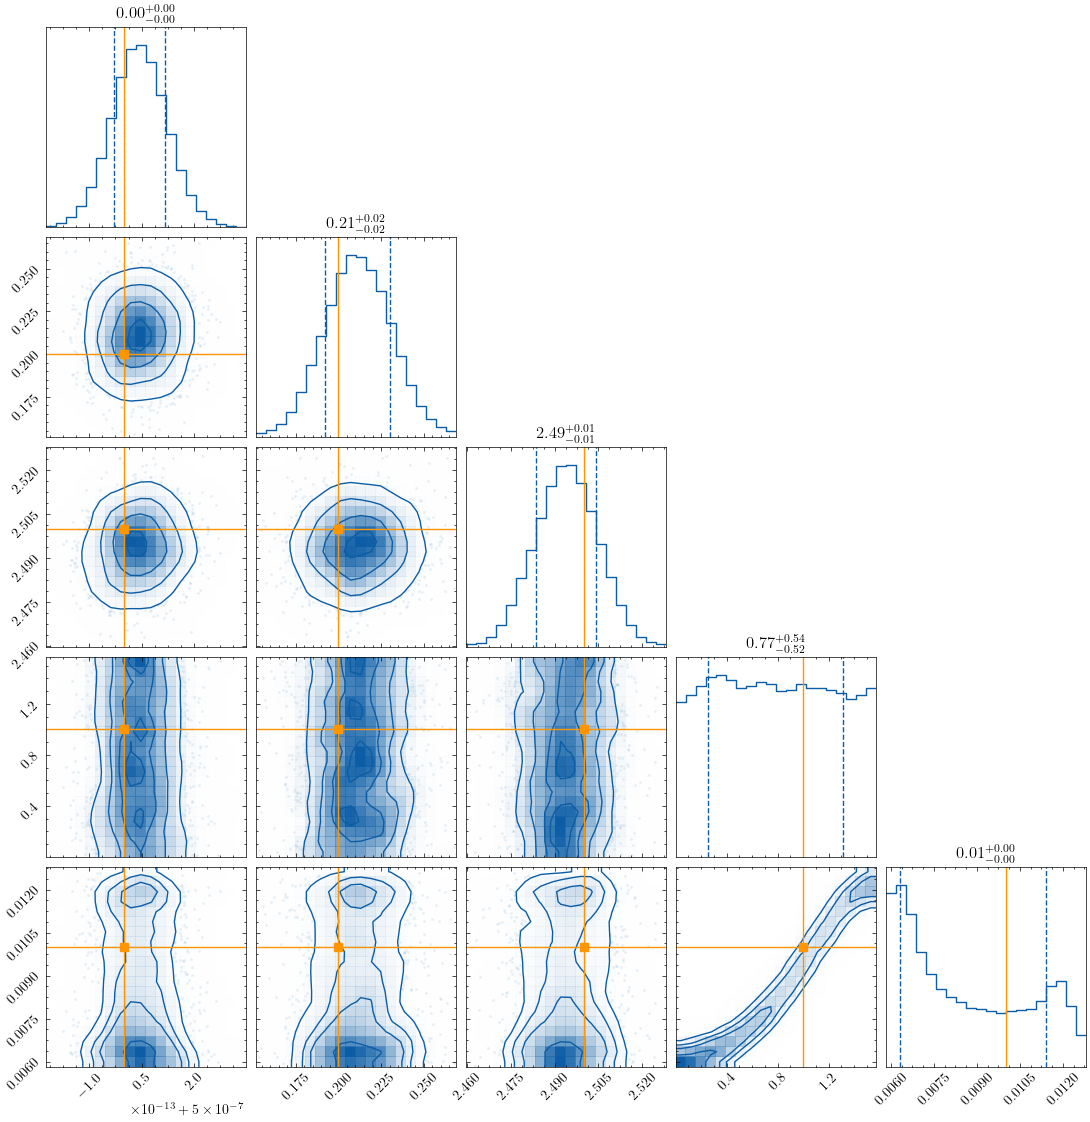

In [4]:
from plotting import plot_custom_corner
path = "../data/nested_sampling/random_walk10_ozstar_result.json"
labels = [r'$\omega$', r'$\Phi_0$',r'$\psi$', r'$\iota$', r'h']
injection_parameters = [5e-7,0.20,2.50,1.0,1e-2]
axes_scales = ["log", "linear","linear","linear","log"]
plot_custom_corner(path,labels, injection_parameters,axes_scales,savefig=None)

## 3.2 Example B: a few more parameters, a few less pulsars 

Lets try a different example where we try to recover more parameters and we use fewer pulsars:


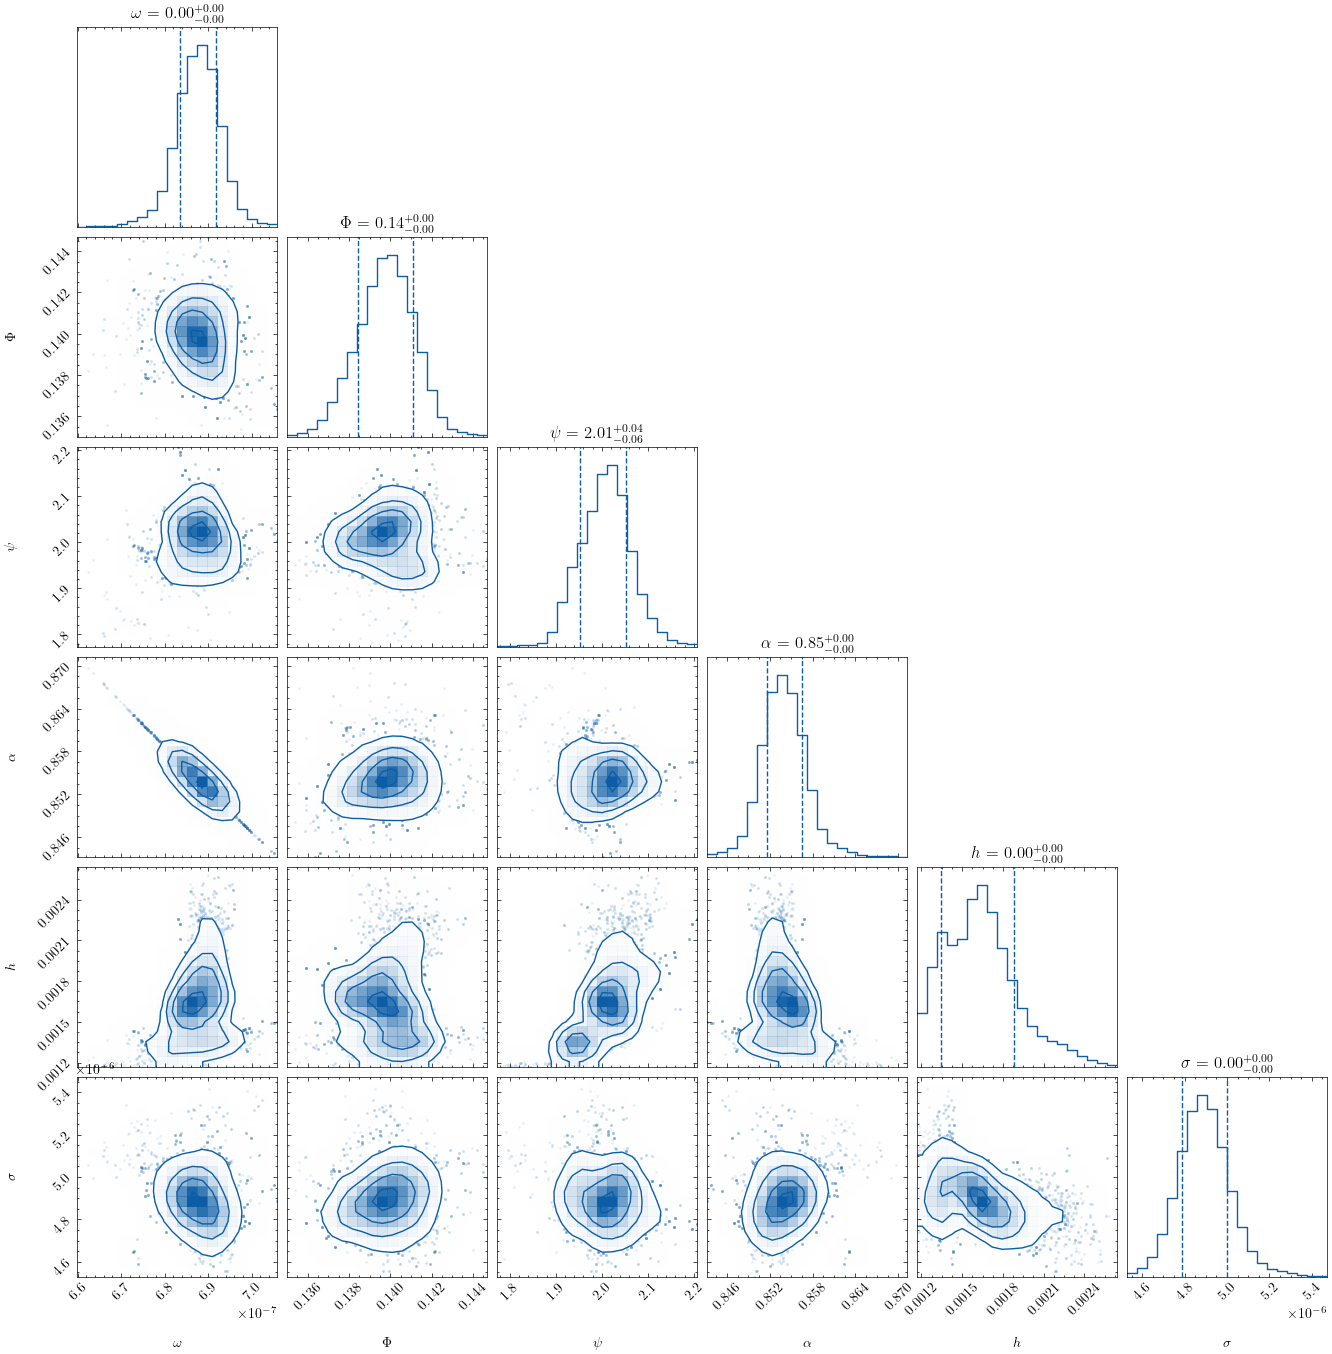

In [163]:
path = "../data/nested_sampling/test49_result.json"
labels = [r"$\omega$",r"$\Phi$",r"$\psi$",r"$\alpha$",r"$h$",r"$\sigma$"]
injection_parameters = [5e-7,0.20,2.50,1.0,1e-2,1e-8]
axes_scales = ["log", "linear","linear","linear","log","log"]
plot_custom_corner(path,labels, injection_parameters,axes_scales)

Again the nested sampling seems to work well.

Do not read too much into these plots - there is no guarantee that the parameters have realistic values. Indeed we know that the strain is very unphysical! This is just to demonstrate convergence of the nested sampler when used with a Kalman filter.




## 4. Likelihood methods and identifiability 


### 4.1 $\mathcal{L}(\hat{\theta})$ plots


When we do parameter estimation using either (a) Nested sampling (c.f. Bilby) or (b) expectation maximisation we want to try to maximise the likelihood.

When we run the Kalman filter for a particular set of parameters it returns a likelihood $\mathcal{L}(\hat{\theta}) = \text{KF}(\hat{\theta})$ 

For each of our parameters, what does the $\mathcal{L}(\hat{\theta})$ curve look like (holding other parameters constant)?

Optimal likelihood is:  -34520.60182502178
0 omega_gw 5e-07
1 psi_gw 2.5
2 iota_gw 1.0
3 delta_gw 1.0
4 alpha_gw 1.0
5 h 0.01
6 f00 327.8470205611185
7 fdot0 -1.227834e-15
8 gamma0 1e-13
9 distance0 181816860005.41092


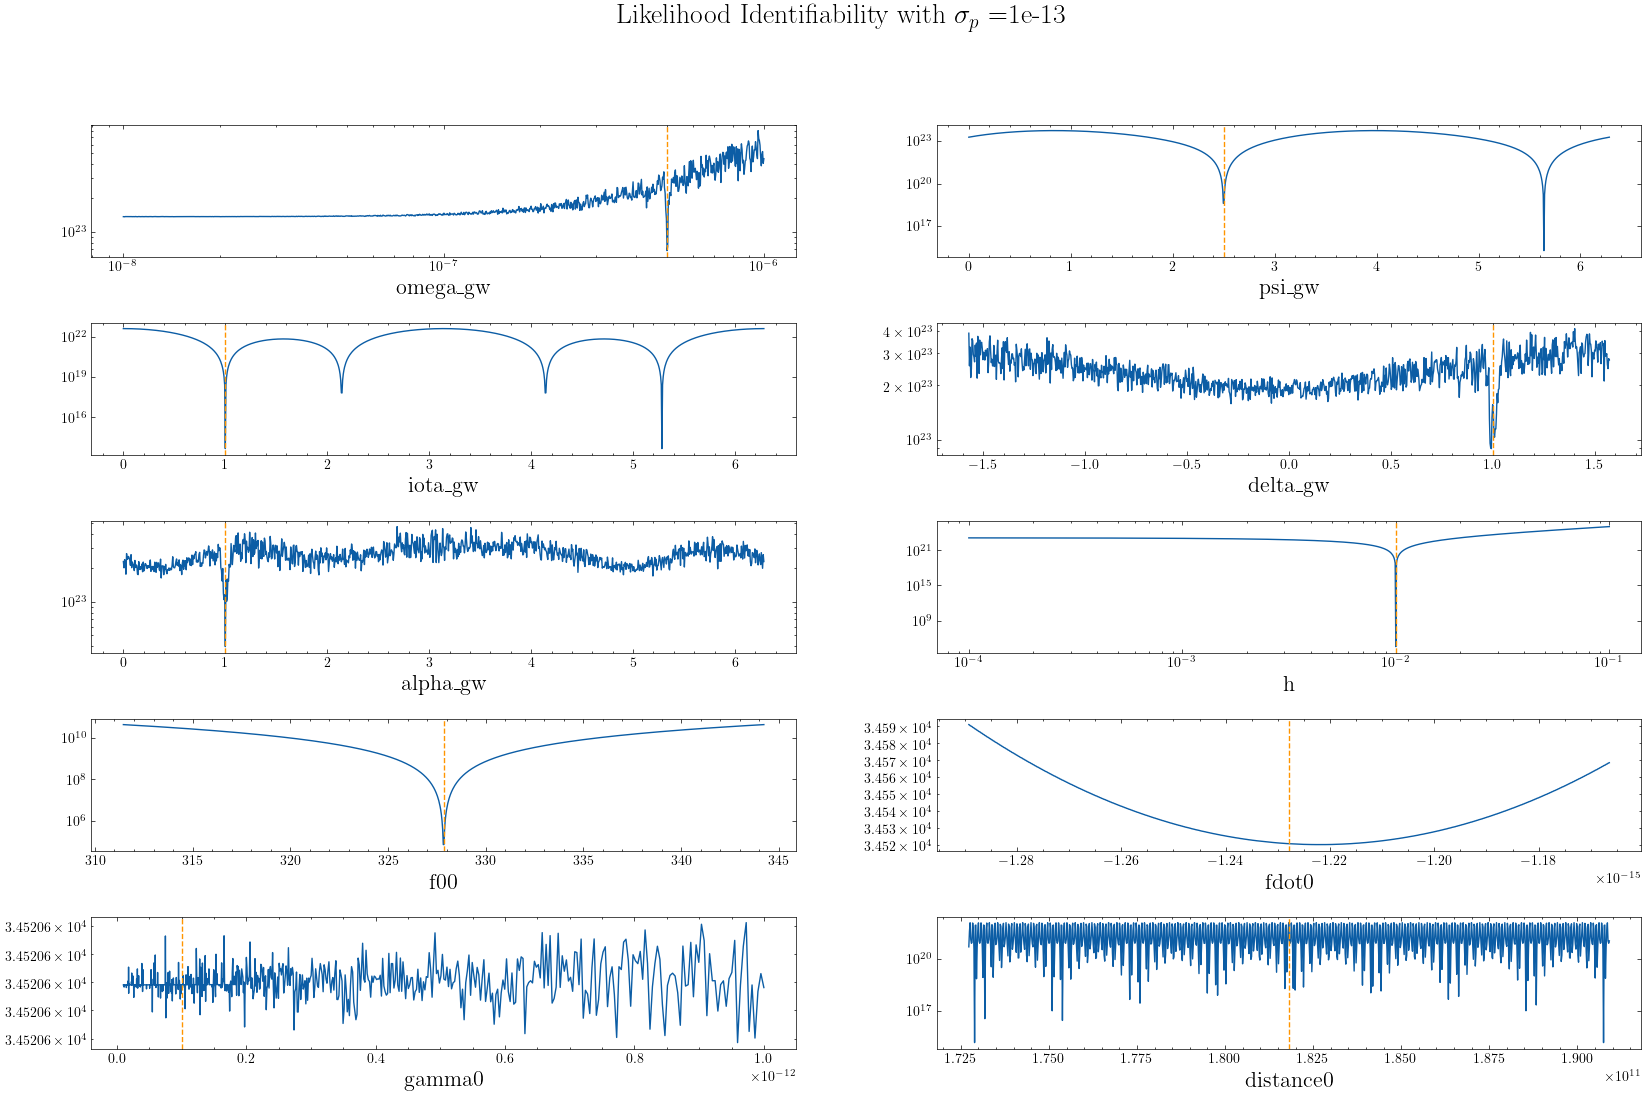

In [359]:
from plotting import likelihoods_over_priors
import numpy as np 


P   = SystemParameters()   # define the system parameters 
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P)    # generate some synthetic data


#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


true_parameters = priors_dict(PTA,P)
model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
print("Optimal likelihood is: ", model_likelihood)



selected_parameters = ["omega_gw","psi_gw","iota_gw","delta_gw","alpha_gw","h","f00","fdot0","gamma0","distance0"]
parameters_dict = {k: true_parameters[k] for k in selected_parameters}


nsamples = int(1e3)
priors = [np.logspace(-8,-6,nsamples),    #omega
          np.linspace(0,2*np.pi,nsamples),#psi
          np.linspace(0,2*np.pi,nsamples), #iota
          np.linspace(-np.pi/2.0,np.pi/2.0,nsamples),        #delta
          np.linspace(0,2*np.pi,nsamples),#alpha
          np.logspace(-4,-1,nsamples), #h
          np.linspace(true_parameters["f00"]*0.95,true_parameters["f00"]*1.05, nsamples), #f0
          np.linspace(true_parameters["fdot0"]*1.05,true_parameters["fdot0"]*0.95, nsamples), #fdot0
          np.logspace(-12,-14,nsamples), #gamma0
          np.linspace(true_parameters["distance0"]*0.95,true_parameters["distance0"]*1.05, nsamples), #distance0
]


likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,sigma_p=P["sigma_p"])




0 omega_gw 5e-07
1 psi_gw 2.5
2 iota_gw 1.0
3 delta_gw 1.0
4 alpha_gw 1.0
5 h 0.01
6 f00 327.8470205611185
7 fdot0 -1.227834e-15
8 gamma0 1e-13
9 distance0 181816860005.41092


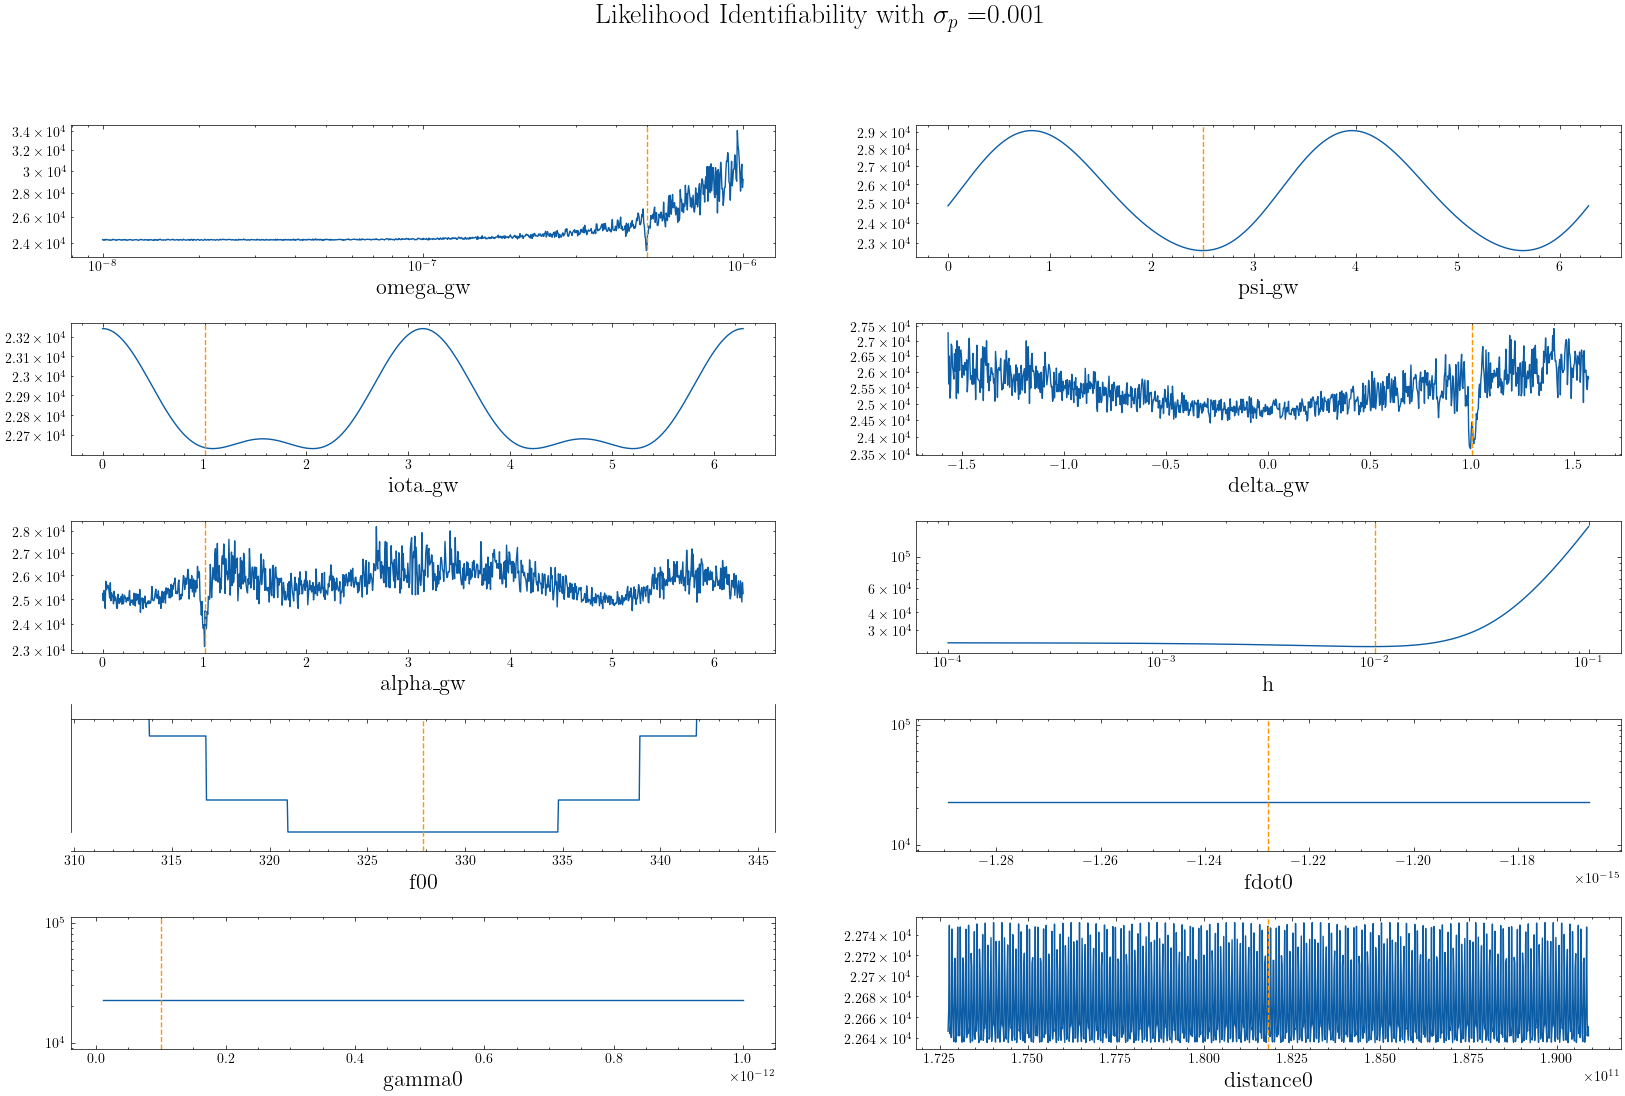

In [363]:
likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,sigma_p=1e-3)


### 4.2 Heatmaps

We can see some issues for some of the parameters, even if we know the true value of all the other parameters.

It is also of interest to explore the Likelihood space in higher dimensions.

For instance, what if we know the true value of all the parameters except $\omega$ and $\delta$?



In [362]:
import numpy as np 

# from scipy.stats import loguniform

# rvs = loguniform.rvs(1e-2, 1e0, size=1000)

P    = SystemParameters()       #define the system parameters as a class
PTA  = Pulsars(P)               #setup the PTA
data = SyntheticData(PTA,P)     # generate some synthetic data

#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Iterate
deltas = np.linspace(-np.pi/2,np.pi/2,200)
omegas = np.logspace(-9,-6,200)
likelihoods = np.zeros((len(deltas),len(omegas)))

for i in range(len(deltas)):
    for j in range(len(omegas)):

        d = deltas[i]
        om = omegas[j]

        true_parameters = priors_dict(PTA,P)
        true_parameters["delta_gw"] = d
        true_parameters["omega_gw"] = om

        model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
        
        likelihoods[i,j] = model_likelihood


In [364]:
d = {}
d['delta'] = deltas
d['omega'] = omegas
d['likelihood'] = likelihoods

np.savez("../data/omega_delta_heatmap_data", **d)



In [366]:
container = np.load("../data/omega_delta_heatmap_data.npz")

data_dict = {name: container[name] for name in container}

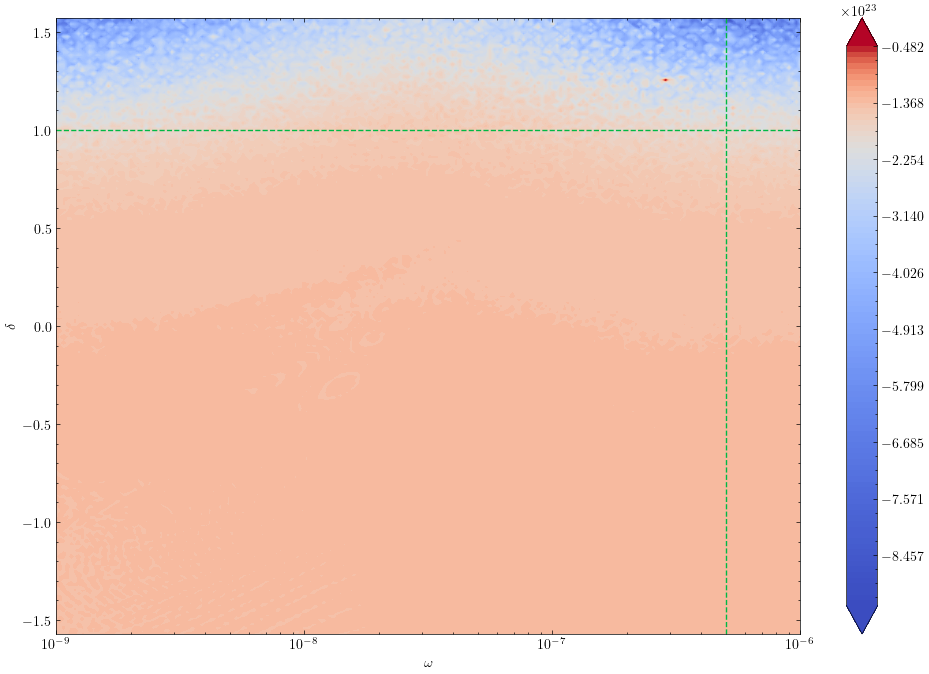

In [378]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
import matplotlib.colors as mc

container = np.load("../data/omega_delta_heatmap_data.npz")

data_dict = {name: container[name] for name in container}

y = data_dict["delta"]
x = data_dict["omega"]
z = data_dict["likelihood"]



plt.figure(figsize=(12,8))
Y,X = np.meshgrid(y,x)
Z = z
levels = np.linspace(Z.min(), Z.max(), 100)
#CS = plt.contourf(x, y, data, levels=levels, cmap=cm.coolwarm, extend='both',norm=mc.LogNorm(vmin=data.min(), vmax=data.max()))
CS = plt.contourf(X, Y, Z, levels=levels, cmap=cm.coolwarm, extend='both',norm=mc.SymLogNorm(linthresh=0.03, linscale=0.03,vmin=Z.min(), vmax=Z.max()))


colorbar = plt.colorbar(CS)
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\delta$")
plt.xscale('log')

plt.axvline(5e-7,c='C1', linestyle="--")
plt.axhline(1.0,c='C1', linestyle="--")


plt.show()

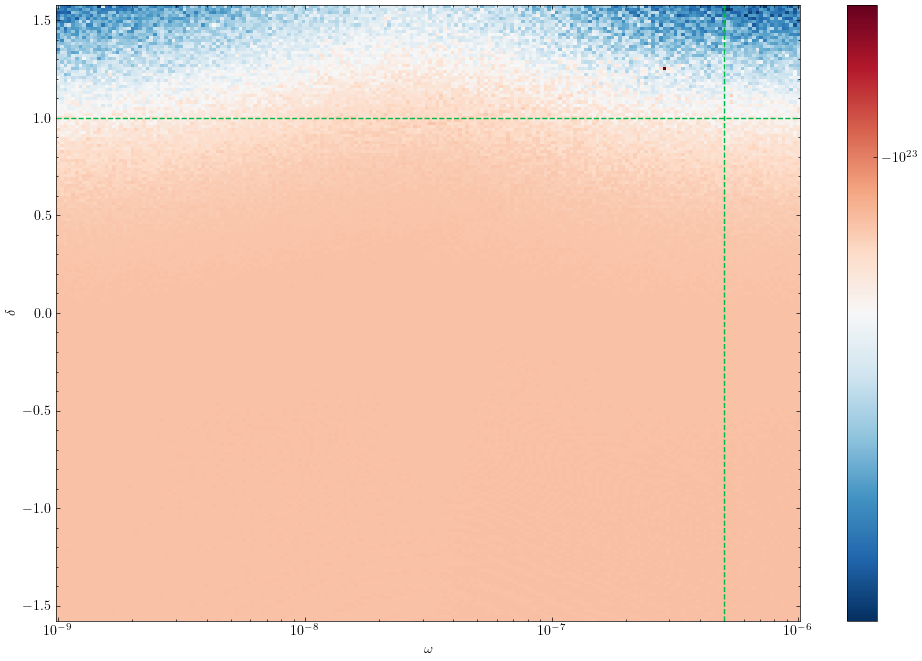

In [375]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
import matplotlib.colors as mc

container = np.load("../data/omega_delta_heatmap_data.npz")

data_dict = {name: container[name] for name in container}

y = data_dict["delta"]
x = data_dict["omega"]
z = data_dict["likelihood"]



plt.figure(figsize=(12,8))
Y,X = np.meshgrid(deltas,omegas)
Z = z
levels = np.linspace(Z.min(), Z.max(), 100)
CS = plt.pcolormesh(X, Y, Z, 
                    cmap='RdBu_r',norm=mc.SymLogNorm(linthresh=0.03, linscale=0.03,vmin=Z.min(), vmax=Z.max()))


colorbar = plt.colorbar(CS)
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\delta$")
plt.xscale('log')

plt.axvline(5e-7,c='C1', linestyle="--")
plt.axhline(1.00,c='C1', linestyle="--")


plt.show()



In [380]:
import numpy as np 

# from scipy.stats import loguniform

# rvs = loguniform.rvs(1e-2, 1e0, size=1000)

P    = SystemParameters()       #define the system parameters as a class
PTA  = Pulsars(P)               #setup the PTA
data = SyntheticData(PTA,P)     # generate some synthetic data

#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Iterate
hs = np.logspace(-4,-1,200)
omegas = np.logspace(-9,-6,200)
likelihoods = np.zeros((len(hs),len(omegas)))

for i in range(len(hs)):
    for j in range(len(omegas)):

        h = hs[i]
        om = omegas[j]

        true_parameters = priors_dict(PTA,P)
        true_parameters["h"] = h
        true_parameters["omega_gw"] = om

        model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
        
        likelihoods[i,j] = model_likelihood


In [383]:
d = {}
d['h'] = hs
d['omega'] = omegas
d['likelihood'] = likelihoods

np.savez("../data/omega_h_heatmap_data", **d)



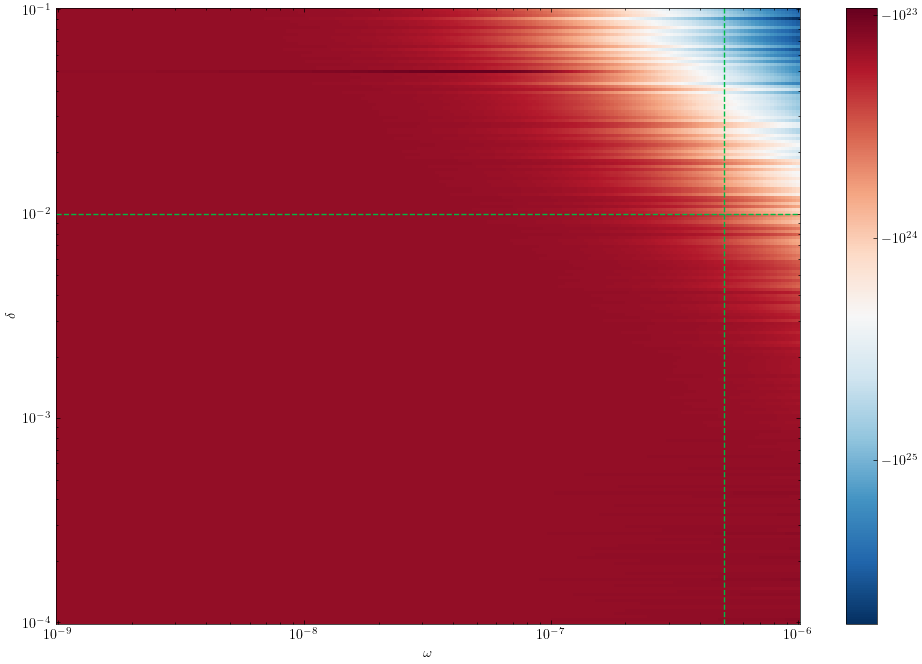

In [384]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
import matplotlib.colors as mc

container = np.load("../data/omega_h_heatmap_data.npz")

data_dict = {name: container[name] for name in container}

y = data_dict["h"]
x = data_dict["omega"]
z = data_dict["likelihood"]



plt.figure(figsize=(12,8))
Y,X = np.meshgrid(y,x)
Z = z
levels = np.linspace(Z.min(), Z.max(), 100)
CS = plt.pcolormesh(X, Y, Z, 
                    cmap='RdBu_r',norm=mc.SymLogNorm(linthresh=0.03, linscale=0.03,vmin=Z.min(), vmax=Z.max()))


colorbar = plt.colorbar(CS)
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\delta$")
plt.xscale('log')
plt.yscale('log')


plt.axvline(5e-7,c='C1', linestyle="--")
plt.axhline(1e-2,c='C1', linestyle="--")


plt.show()



---

## Scratch space







In [431]:
import numpy as np 

# from scipy.stats import loguniform

# rvs = loguniform.rvs(1e-2, 1e0, size=1000)

P    = SystemParameters()       #define the system parameters as a class
PTA  = Pulsars(P)               #setup the PTA
data = SyntheticData(PTA,P)     # generate some synthetic data

#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Iterate
deltas = np.linspace(0.9,1.1,500)
#deltas = np.arange(1e-8,1e-5,1e-8)
#deltas = np.logspace(-8,-5,10)
deltas = np.logspace(-8,-6,int(1e3))

likelihoods = np.zeros_like(deltas)

for i in range(len(deltas)):
        d = deltas[i]
       
        true_parameters = priors_dict(PTA,P)
        true_parameters["delta_gw"] = 1.000000001
        true_parameters["omega_gw"] = d
        #print(d)
       
        model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
        likelihoods[i] = model_likelihood


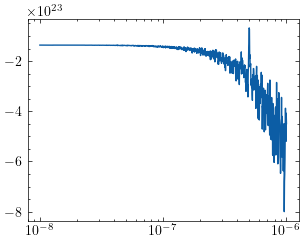

In [433]:
plt.plot(deltas,likelihoods)
plt.xscale('log')

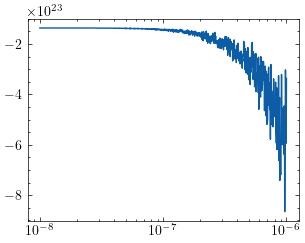

In [430]:
plt.plot(deltas,likelihoods)
plt.xscale('log')

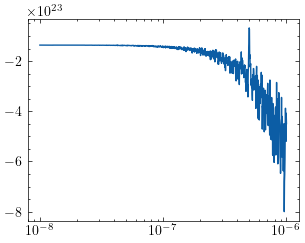

In [428]:
plt.plot(deltas,likelihoods)
plt.xscale('log')

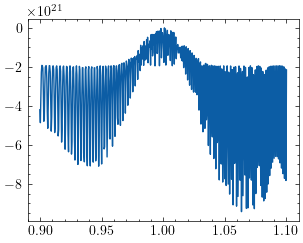

In [418]:
plt.plot(deltas,likelihoods)

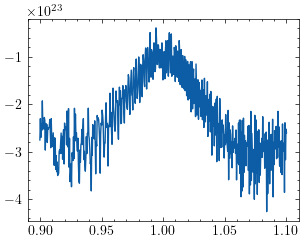

In [413]:
plt.plot(deltas,likelihoods)

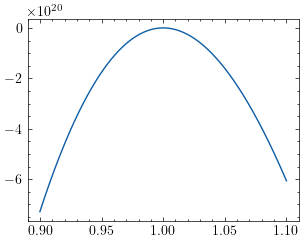

In [411]:
plt.plot(deltas,likelihoods)

In [ ]:
plt.plot(deltas,likelihoods)

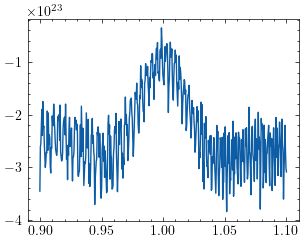

In [409]:
plt.plot(deltas,likelihoods)